✅ Data saved at data/raw/iris.csv
✅ Processed data saved at data/processed/featured_iris.csv
✅ Train set saved at data/processed/train_iris.csv
✅ Test set saved at data/processed/test_iris.csv
✅ Model saved at models/model.joblib
✅ Evaluation complete. Metrics saved at reports/metrics.json


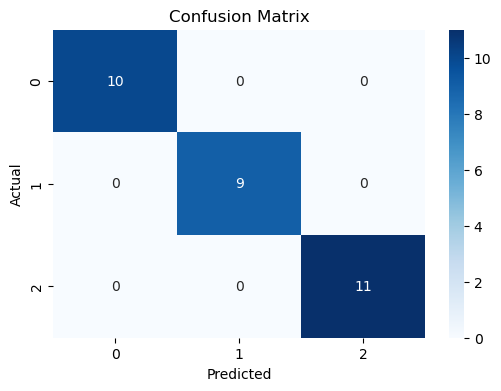

In [24]:
import pandas as pd
import yaml
import joblib
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Configuration
with open('params.yaml', 'r') as file:
    config = yaml.safe_load(file)

data_config = config.get('data_load', {})
featurize_config = config.get('featurize', {})
data_split_config = config.get('data_split', {})
train_config = config.get('train', {})
evaluate_config = config.get('evaluate', {})

# Load Data
data_path = data_config.get('dataset_path', 'data/raw/iris.csv')
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
df.to_csv(data_path, index=False)
print(f"✅ Data saved at {data_path}")

# Feature Engineering
df['species'] = df['species'].astype('category').cat.codes
processed_data_path = featurize_config.get('processed_path', 'data/processed/featured_iris.csv')
df.to_csv(processed_data_path, index=False)
print(f"✅ Processed data saved at {processed_data_path}")

# Train-Test Split
test_size = data_split_config.get('test_size', 0.2)
random_state = config.get('base', {}).get('random_state', 42)
train_path = data_split_config.get('trainset_path', 'data/processed/train_iris.csv')
test_path = data_split_config.get('testset_path', 'data/processed/test_iris.csv')
train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state)
train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)
print(f"✅ Train set saved at {train_path}")
print(f"✅ Test set saved at {test_path}")

# Model Training
target_column = featurize_config.get('target_column', 'species')
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column]
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
model_path = train_config.get('model_path', 'models/model.joblib')
joblib.dump(model, model_path)
print(f"✅ Model saved at {model_path}")

# Model Evaluation
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column]
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
metrics = {"accuracy": acc, "confusion_matrix": cm.tolist()}
metrics_path = evaluate_config.get('metrics_path', 'reports/metrics.json')
with open(metrics_path, 'w') as f:
    json.dump(metrics, f)
print(f"✅ Evaluation complete. Metrics saved at {metrics_path}")

# Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
